In [1]:
!pip install -q autogluon

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
keras-cv 0.8.2 requires keras-core, which is not installed.
keras-nlp 0.9.3 requires keras-core, which is not installed.
tensorflow-decision-forests 1.8.1 requires wurlitzer, which is not installed.
aiobotocore 2.12.3 requires botocore<1.34.70,>=1.34.41, but you have botocore 1.29.165 which is incompatible.
albumentations 1.4.0 requires scikit-image>=0.21.0, but you have scikit-image 0.20.0 which is incompatible.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.8 which is incompatible.
apache-beam 2.46.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.26.4 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 15.0.2 which is incompatible.
beatrix-jupyterlab 2023.128.151533 requires jupyterlab~=3.6.0, but you have jupyterlab 4.1.6 which is incomp

In [2]:
from autogluon.tabular import TabularPredictor,TabularDataset
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
import shutil

warnings.filterwarnings('ignore')
seed = 27

# Loading the Dataset

In [3]:
train = pd.read_csv('/kaggle/input/playground-series-s4e5/train.csv', index_col='id')
test = pd.read_csv('/kaggle/input/playground-series-s4e5/test.csv', index_col='id')

In [4]:
train.head(10).T

id,0,1,2,3,4,5,6,7,8,9
MonsoonIntensity,5.000,6.00,6.00,3.000,5.000,5.00,8.00,6.000,5.000,4.000
TopographyDrainage,8.000,7.00,5.00,4.000,3.000,4.00,3.00,6.000,2.000,2.000
RiverManagement,5.000,4.00,6.00,6.000,2.000,1.00,1.00,5.000,8.000,3.000
Deforestation,8.000,4.00,7.00,5.000,6.000,4.00,2.00,7.000,5.000,5.000
Urbanization,6.000,8.00,3.00,4.000,4.000,2.00,3.00,5.000,4.000,8.000
ClimateChange,4.000,8.00,7.00,8.000,4.000,4.00,7.00,5.000,5.000,6.000
DamsQuality,4.000,3.00,1.00,4.000,3.000,6.00,3.00,3.000,2.000,5.000
Siltation,3.000,5.00,5.00,7.000,3.000,6.00,4.00,5.000,4.000,5.000
AgriculturalPractices,3.000,4.00,4.00,6.000,3.000,7.00,6.00,5.000,5.000,7.000
Encroachments,4.000,6.00,5.00,8.000,3.000,5.00,7.00,5.000,5.000,6.000


In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
MonsoonIntensity,1117957.0,4.921450,2.056387,0.000,3.00,5.000,6.00,16.000
TopographyDrainage,1117957.0,4.926671,2.093879,0.000,3.00,5.000,6.00,18.000
RiverManagement,1117957.0,4.955322,2.072186,0.000,4.00,5.000,6.00,16.000
Deforestation,1117957.0,4.942240,2.051689,0.000,4.00,5.000,6.00,17.000
Urbanization,1117957.0,4.942517,2.083391,0.000,3.00,5.000,6.00,17.000
ClimateChange,1117957.0,4.934093,2.057742,0.000,3.00,5.000,6.00,17.000
DamsQuality,1117957.0,4.955878,2.083063,0.000,4.00,5.000,6.00,16.000
Siltation,1117957.0,4.927791,2.065992,0.000,3.00,5.000,6.00,16.000
AgriculturalPractices,1117957.0,4.942619,2.068545,0.000,3.00,5.000,6.00,16.000
Encroachments,1117957.0,4.949230,2.083324,0.000,4.00,5.000,6.00,18.000


# Preprocessing
- Using sum feature suggested by @ambrosm [here](https://www.kaggle.com/competitions/playground-series-s4e5/discussion/499274)
- Sorting features as suggested by @siukeitin [here](https://www.kaggle.com/competitions/playground-series-s4e5/discussion/499579)
- Adding a few other statistical features which have been suggested on the forums by various people

In [6]:
def add_stat_features(dataframe, cols):
    dataframe['_sum'] = dataframe[cols].sum(1)
    dataframe['_mean'] = dataframe[cols].mean(1)
    dataframe['_median'] = dataframe[cols].median(1)
    dataframe['_max'] = dataframe[cols].max(axis=1)
    dataframe['_min'] = dataframe[cols].min(axis=1)
    dataframe['_mode'] = dataframe[cols].mode(axis=1)[0]
    dataframe['_25th'] = dataframe[cols].quantile(0.25, axis=1)
    dataframe['_75th'] = dataframe[cols].quantile(0.75, axis=1)
    dataframe['_hmean'] = len(cols) / dataframe[cols].apply(lambda x: (1/x).mean(), axis=1)
    dataframe['_gmean'] = dataframe[cols].apply(lambda x: x.prod()**(1/len(x)), axis=1)
    dataframe['_2nd_oment'] = dataframe[cols].apply(lambda x: (x**2).mean(), axis=1)
    dataframe['_3rd_moment'] = dataframe[cols].apply(lambda x: (x**3).mean(), axis=1)
    dataframe['_entropy'] = dataframe[cols].apply(lambda x: -1*(x*np.log(x)).sum(), axis=1)
    sorted_features = [f"_sort_{i}" for i in np.arange(len(cols))]
    dataframe[sorted_features] = np.sort(dataframe[cols], axis=1)
    for i in range(10, 100, 10):
        dataframe[f'_{i}th'] = dataframe[cols].quantile(i/100, axis=1)

    return dataframe

In [7]:
feature_cols = list(test.columns)

train = add_stat_features(train, feature_cols)
train = train.drop(feature_cols, axis=1)

test = add_stat_features(test, feature_cols) 
test = test.drop(feature_cols, axis=1)

In [8]:
_train, _val = train_test_split(
    train, 
    test_size=0.1, 
    random_state=seed
)

In [9]:
_train = TabularDataset(_train)
_val = TabularDataset(_val)
test = TabularDataset(test)

# Training

In [10]:
predictor = TabularPredictor(
    label='FloodProbability',
    eval_metric='r2',
    problem_type="regression",
    verbosity=2
).fit(
    train_data=_train,
    time_limit=3600 * 8,
    presets="best_quality",
    excluded_model_types = ["NN_TORCH", "NN"],
#     keep_only_best=True
)

No path specified. Models will be saved in: "AutogluonModels/ag-20240510_142416"
Presets specified: ['best_quality']
Setting dynamic_stacking from 'auto' to True. Reason: Enable dynamic_stacking when use_bag_holdout is disabled. (use_bag_holdout=False)
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 28800 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240510_142416/ds_sub_fit/sub_fit_ho.
2024-05-10 14:24:16,514	INFO util.py:124 -- Outdated packages:
  ipywidgets==

In [11]:
X_train = _train.drop('FloodProbability', axis=1)
y_train = _train['FloodProbability']

y_preds = predictor.predict(X_train)

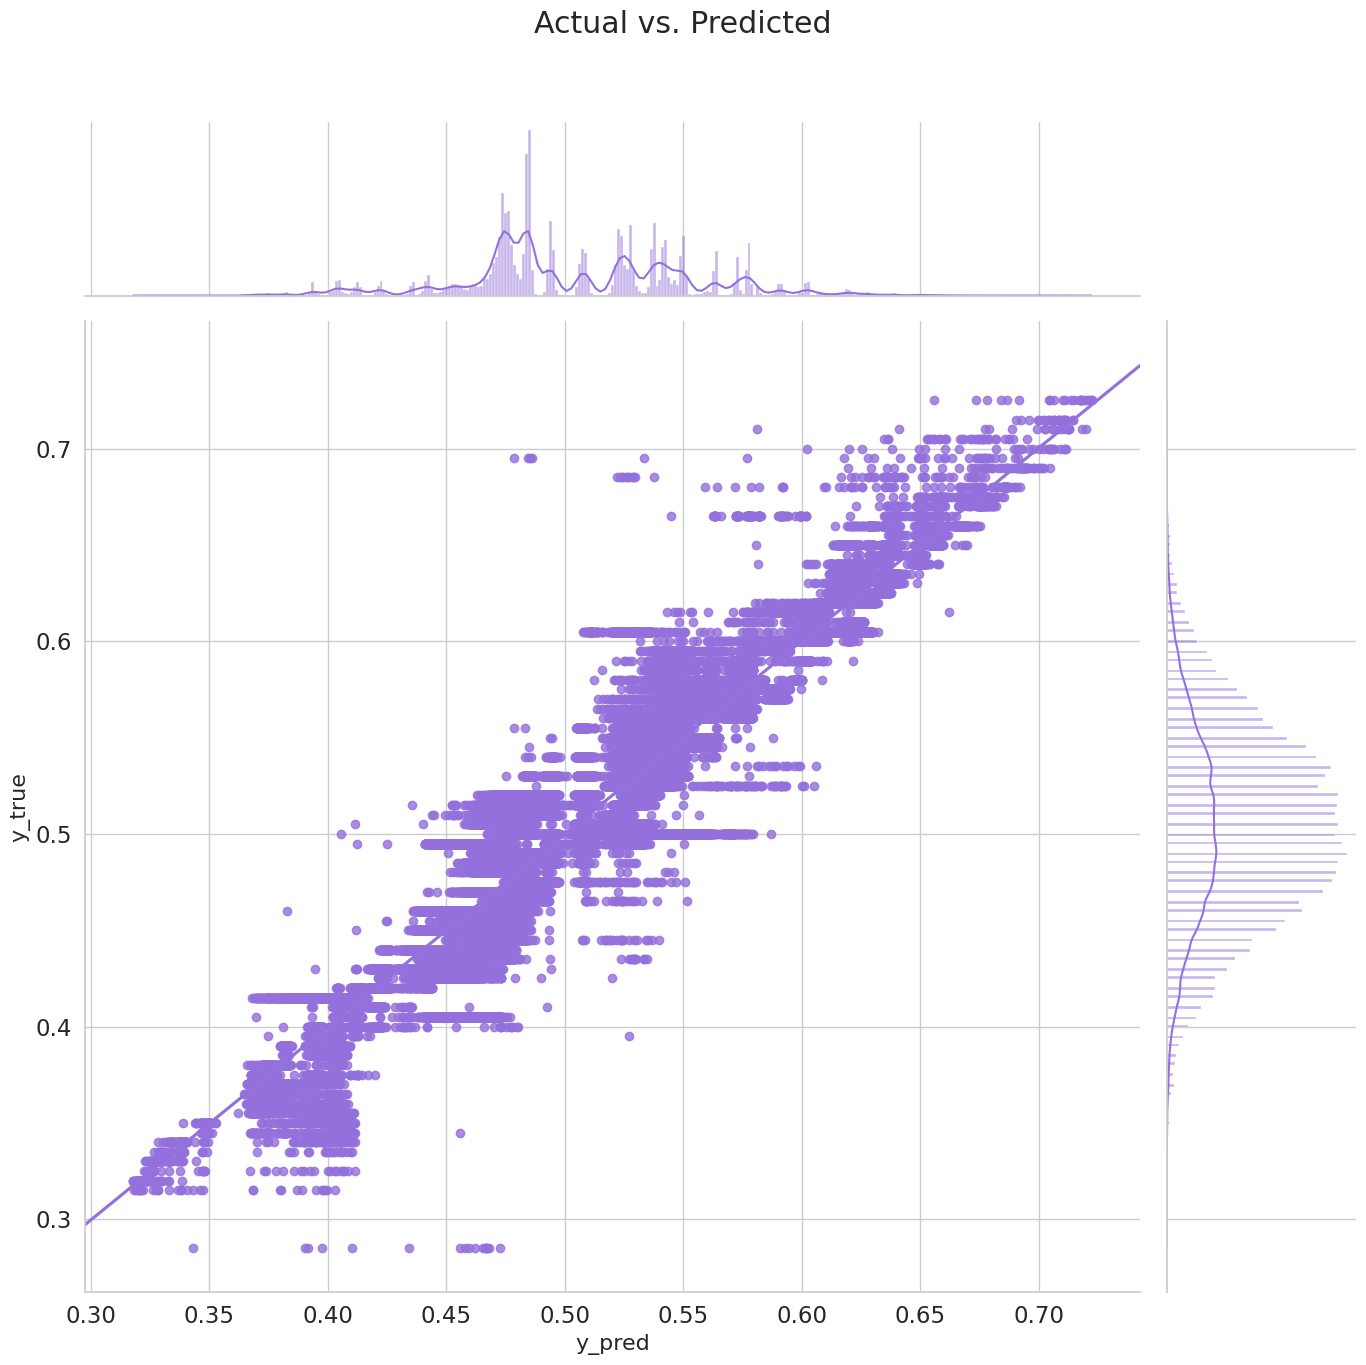

In [12]:
sns.set(style="whitegrid", font_scale=1.5)
g = sns.jointplot(
    x=y_preds,
    y=y_train,
    kind="reg",
    truncate=False,
    color='#9370DB',
    height=14,
)
g.set_axis_labels('y_pred', 'y_true', fontsize=16)
g.fig.suptitle("Actual vs. Predicted")
g.fig.tight_layout()
g.fig.subplots_adjust(top=0.9)

# Visualizing the Results

In [13]:
score = predictor.evaluate(_val, silent=True)['r2']

In [14]:
print(f"Validation R2 Score: {score}")

Validation R2 Score: 0.8693003873519692


In [15]:
fi = predictor.feature_importance(data=_val, silent=True)
lb = predictor.leaderboard(_val, silent=True)

These features in provided data are not utilized by the predictor and will be ignored: ['_sort_0', '_sort_19', '_50th']
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU
INFO:sklearnex: sklearn.neighbors.KNeighborsRegressor.predict: running accelerated version on CPU
INFO:sklearnex: sklearn.utils.validation._assert_all_finite: running accelerated version on CPU


In [16]:
lb.style.background_gradient(subset=['score_val', 'score_test'], cmap='RdYlGn')

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,0.869300,0.869235,r2,31.776824,104.268694,9385.623572,0.007729,0.022550,7.027308,2,True,17
1,CatBoost_r9_BAG_L1,0.869279,0.869200,r2,15.657536,18.107783,2154.748636,15.657536,18.107783,2154.748636,1,True,13
2,CatBoost_r177_BAG_L1,0.869270,0.869166,r2,2.568905,2.326603,2670.912243,2.568905,2.326603,2670.912243,1,True,11
3,CatBoost_BAG_L1,0.869267,0.869175,r2,1.374243,2.805715,3361.557952,1.374243,2.805715,3361.557952,1,True,6
4,XGBoost_BAG_L1,0.869178,0.869078,r2,7.574624,21.496703,282.560781,7.574624,21.496703,282.560781,1,True,9
5,ExtraTreesMSE_BAG_L1,0.866318,0.866045,r2,4.593787,59.509339,908.816652,4.593787,59.509339,908.816652,1,True,7
6,LightGBMXT_BAG_L1,0.866193,0.865692,r2,17.918285,127.910422,1331.568722,17.918285,127.910422,1331.568722,1,True,3
7,NeuralNetFastAI_BAG_L1,0.864766,0.864628,r2,11.651539,16.625946,2518.263440,11.651539,16.625946,2518.263440,1,True,8
8,RandomForestMSE_BAG_L1,0.864583,0.864216,r2,7.844513,64.650446,1970.469027,7.844513,64.650446,1970.469027,1,True,5
9,LightGBM_r96_BAG_L1,0.863536,0.863473,r2,45.453956,344.163017,1753.959242,45.453956,344.163017,1753.959242,1,True,14


In [17]:
fi.style.background_gradient(cmap='RdYlGn')

,importance,stddev,p_value,n,p99_high,p99_low
_sum,0.438753,0.001385,0.000000,5,0.441603,0.435902
_mean,0.356238,0.002322,0.000000,5,0.361020,0.351456
_entropy,0.003936,0.000449,0.000020,5,0.004860,0.003013
_max,0.002871,0.000298,0.000014,5,0.003486,0.002256
_gmean,0.000976,0.000547,0.008103,5,0.002102,-0.000149
_2nd_oment,0.000731,0.000229,0.001024,5,0.001203,0.000259
_3rd_moment,0.000673,0.000272,0.002597,5,0.001232,0.000113
_hmean,0.000332,0.000301,0.034656,5,0.000953,-0.000288
_60th,0.000309,0.000168,0.007279,5,0.000654,-0.000036
_sort_18,0.000183,0.000071,0.002311,5,0.000330,0.000036


# Making Predictions and Creating a Submission File

In [18]:
preds = predictor.predict(test)

In [19]:
submission = pd.DataFrame({'id': test.index, 'FloodProbability ': preds})
submission.to_csv(f'autogluon-{score:.6f}.csv', index=False)
submission.head()

,id,FloodProbability
id,,
1117957,1117957,0.578527
1117958,1117958,0.455529
1117959,1117959,0.447799
1117960,1117960,0.467371
1117961,1117961,0.466578


In [20]:
shutil.rmtree("AutogluonModels")